In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/content/gurgaon_properties_cleaned_v2.csv")

In [4]:
df.shape

(3803, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3802 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   int64  
 8   bathroom             3803 non-null   int64  
 9   balcony              3803 non-null   object 
 10  floorNum             3784 non-null   float64
 11  facing               2698 non-null   object 
 12  agePossession        3803 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area          1944 non-null   f

In [6]:
df.duplicated().sum()

126

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,vatika lifestyle homes,sector 83,1.25,6839.0,1828.0,Super Built up area 1827.5(169.78 sq.m.),3,2,1,...,1827.5,NaN,NaN,1,1,1,1,0,2,174
1,flat,ats triumph,sector 104,4.45,6846.0,6500.0,Carpet area: 6500 (603.87 sq.m.),4,5,3+,...,NaN,NaN,6500.0,0,0,0,0,0,1,110
2,flat,puri diplomatic greens,sector 111,3.50,11864.0,2950.0,Super Built up area 2950(274.06 sq.m.)Built Up...,4,5,3+,...,2950.0,2700.0,2500.0,0,1,0,0,0,0,49
3,flat,shapoorji pallonji joyville gurugram,sector 102,1.26,10041.0,1255.0,Super Built up area 1215(112.88 sq.m.),2,2,2,...,1215.0,NaN,NaN,0,0,0,0,0,1,108
4,flat,bptp terra,sector 37d,1.45,8006.0,1811.0,Super Built up area 1811(168.25 sq.m.)Built Up...,3,3,3,...,1811.0,1711.0,1611.0,0,0,0,0,0,1,149


# **property type**

<Axes: xlabel='property_type'>

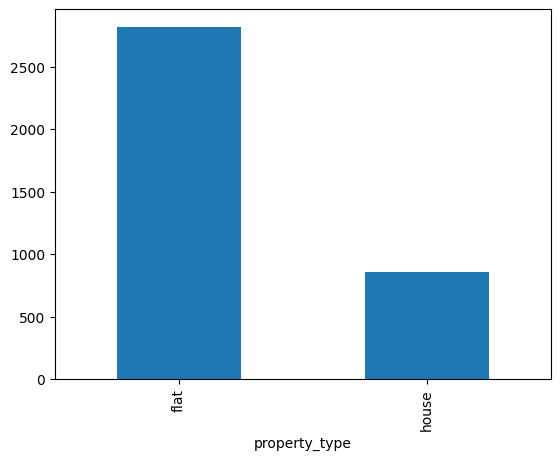

In [9]:
df['property_type'].value_counts().plot(kind='bar')

# **Society**

In [10]:
df['society'].value_counts().shape

(676,)

In [11]:
df['society'].value_counts()

,count
society,
independent,486
tulip violet,75
ss the leaf,73
shapoorji pallonji joyville gurugram,42
dlf new town heights,42
...,...
new sathi apartments,1
housing apna enclave,1
woodstock floors,1


In [12]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

,proportion
society,
tulip violet,0.023511
ss the leaf,0.046395
shapoorji pallonji joyville gurugram,0.059561
dlf new town heights,0.072727
signature global park,0.083699
...,...
ansal heights 86,0.490282
the close north,0.494357
umang monsoon breeze,0.498433


In [13]:
# frequency dist
society_counts=df['society'].value_counts()
frequency_bins={
    "very high (>100)" :(society_counts>100).sum(),
    "high (50-100)" :((society_counts>= 50) & (society_counts <= 100)).sum(),
    'average (10-49)': ((society_counts>= 10) & (society_counts <= 49)).sum(),
    "low (2-9)"   :((society_counts> 1) & (society_counts < 10)).sum(),
    "very low" : ((society_counts <= 1)).sum()
}
frequency_bins

{'very high (>100)': 1,
 'high (50-100)': 2,
 'average (10-49)': 92,
 'low (2-9)': 273,
 'very low': 308}

<Axes: xlabel='society'>

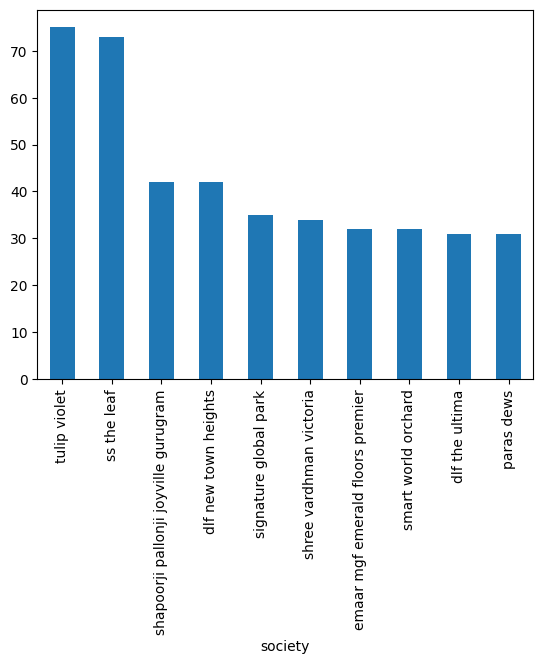

In [14]:
# top 10 societies
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [15]:
df['society'].isnull().sum()

1

In [16]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2865,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,...,NaN,1625.0,NaN,0,0,0,0,0,1,0


# **sectors**

In [17]:
df['sector'].value_counts().shape

(113,)

<Axes: xlabel='sector'>

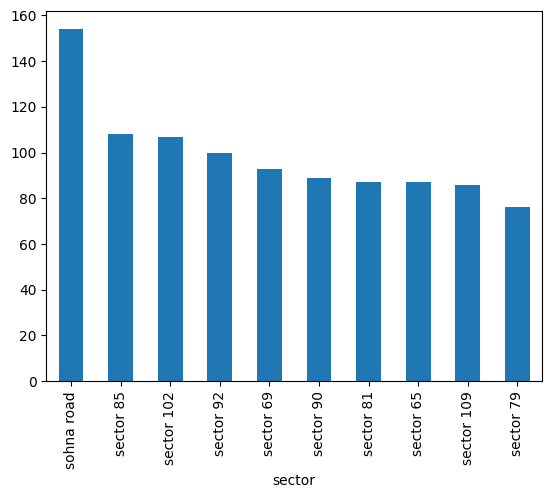

In [18]:
# top 10 sectors
df['sector'].value_counts().head(10).plot(kind='bar')

In [19]:
# frequency dist
sector_counts=df['sector'].value_counts()
frequency_bins={
    "very high (>100)" :(sector_counts>100).sum(),
    "high (50-100)" :((sector_counts>= 50) & (sector_counts <= 100)).sum(),
    'average (10-49)': ((sector_counts>= 10) & (sector_counts <= 49)).sum(),
    "low (2-9)"   :((sector_counts> 1) & (sector_counts < 10)).sum(),
    "very low" : ((sector_counts <= 1)).sum()
}
frequency_bins

{'very high (>100)': 3,
 'high (50-100)': 25,
 'average (10-49)': 63,
 'low (2-9)': 21,
 'very low': 1}

# **Price**

In [20]:
df['price'].isnull().sum()

17

In [21]:
df['price'].describe()

,price
count,3660.000000
mean,2.533664
std,2.980623
min,0.070000
25%,0.950000
50%,1.520000
75%,2.750000
max,31.500000


<Axes: xlabel='price', ylabel='Count'>

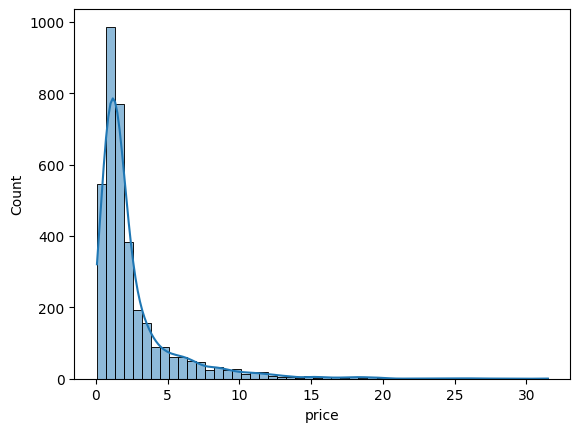

In [22]:
sns.histplot(df['price'],kde=True,bins=50)

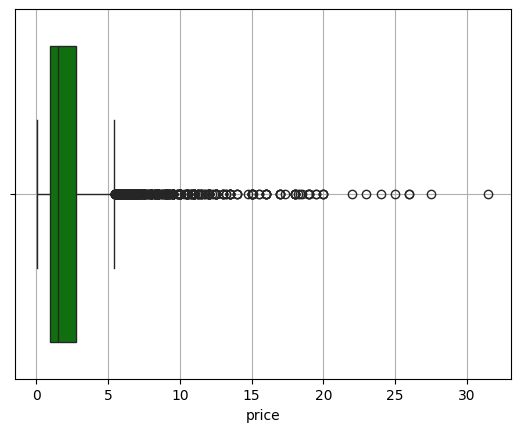

In [23]:
# boxplot
sns.boxplot(x=df['price'],color='green')
plt.grid()

In [24]:
# skewness and kurtosis'
skewness=df['price'].skew()
kurtosis = df['price'].kurt()
print(skewness,kurtosis)

3.2791704733134615 14.933372629214254


In [25]:
# quantile analysis
quantiles=df['price'].quantile([0.01,0.05,0.95,0.99])
quantiles

,price
0.01,0.250
0.05,0.370
0.95,8.500
0.99,15.264


In [26]:
# identify outliers using iqr mthd
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

IQR

1.8

In [27]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.7500000000000002 5.45


In [28]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(425, 23)

In [29]:
outliers['price'].describe()

,price
count,425.000000
mean,9.235624
std,4.065259
min,5.460000
25%,6.460000
50%,8.000000
75%,10.750000
max,31.500000


<Axes: xlabel='price'>

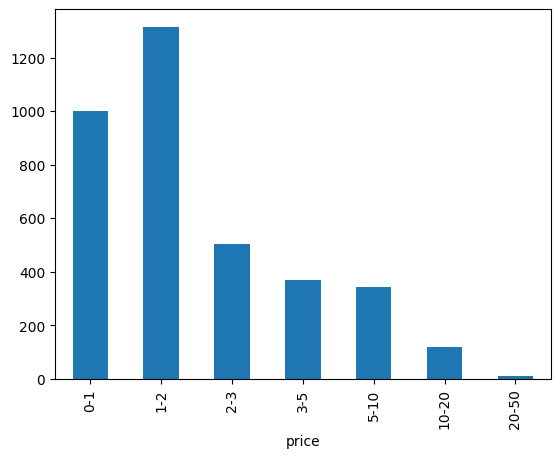

In [30]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

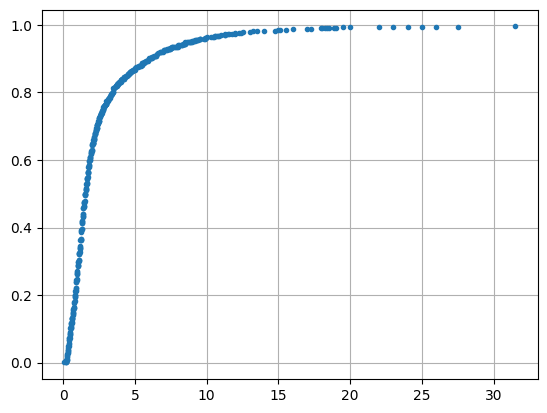

In [31]:
# ecdf plot
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

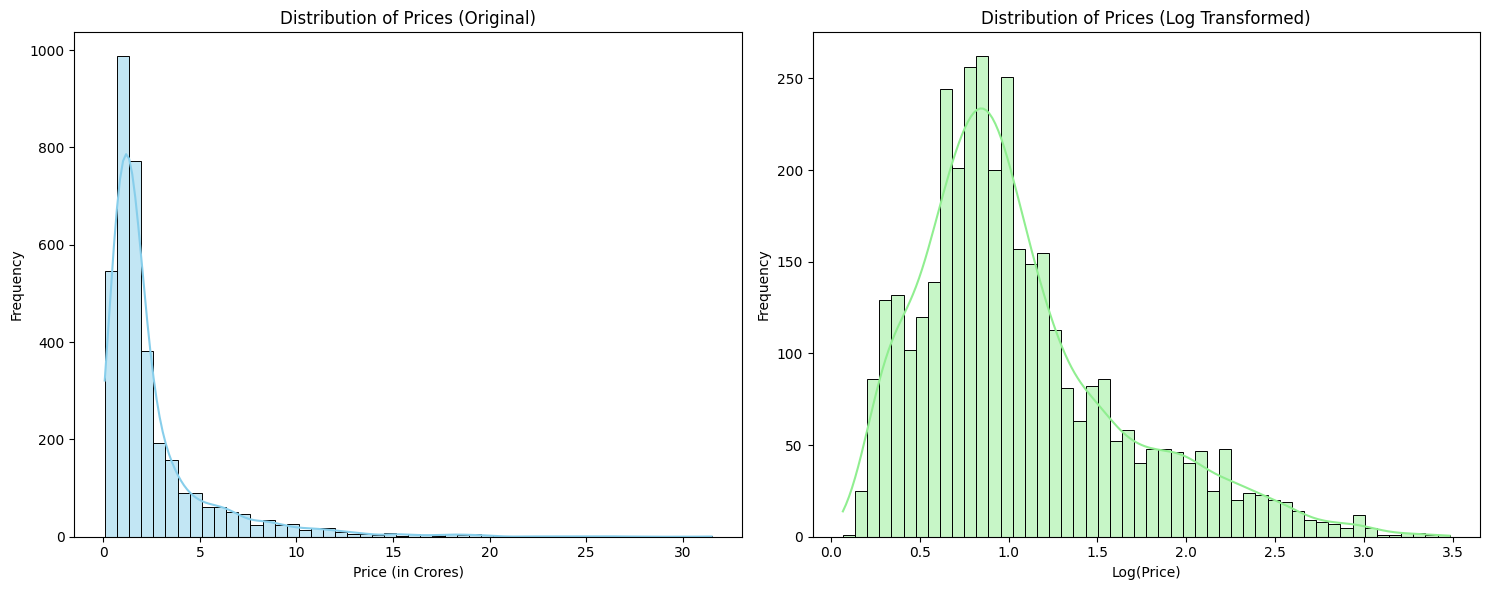

In [32]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [33]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.0740709565255315 0.9646692415449274


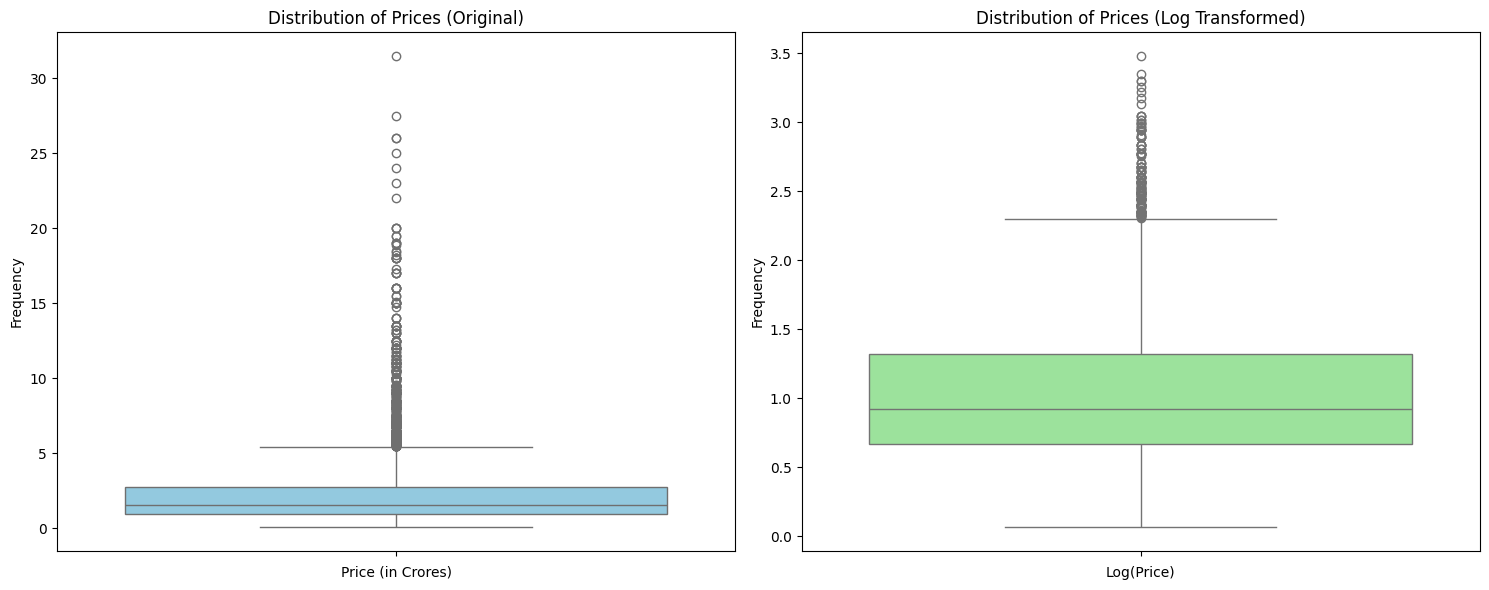

In [34]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# **price_per_sqft**

In [35]:
df['price_per_sqft'].isnull().sum()

17

In [36]:
df['price_per_sqft'].describe()

,price_per_sqft
count,3660.000000
mean,13892.668306
std,23210.067190
min,4.000000
25%,6817.250000
50%,9020.000000
75%,13880.500000
max,600000.000000


<Axes: xlabel='price_per_sqft', ylabel='Count'>

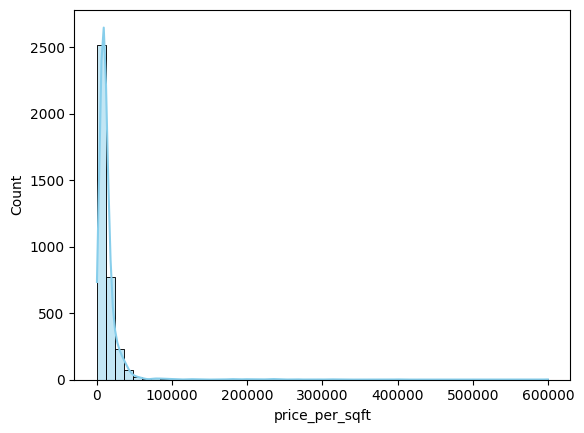

In [37]:
sns.histplot(df['price_per_sqft'], bins=50, color='skyblue', kde=True)

<Axes: ylabel='price_per_sqft'>

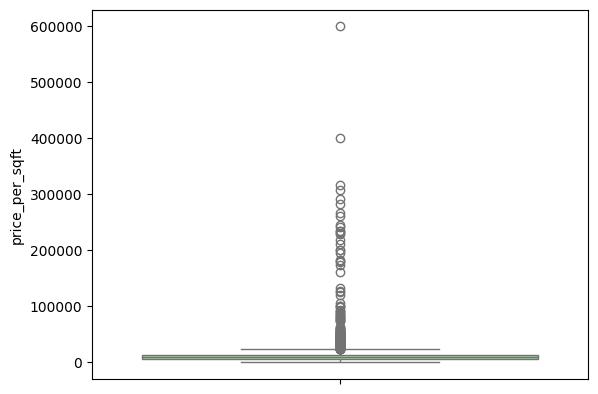

In [38]:
sns.boxplot(df['price_per_sqft'], color='lightgreen')

# **bedRoom**

In [39]:
df['bedRoom'].isnull().sum()

0

<Axes: xlabel='bedRoom'>

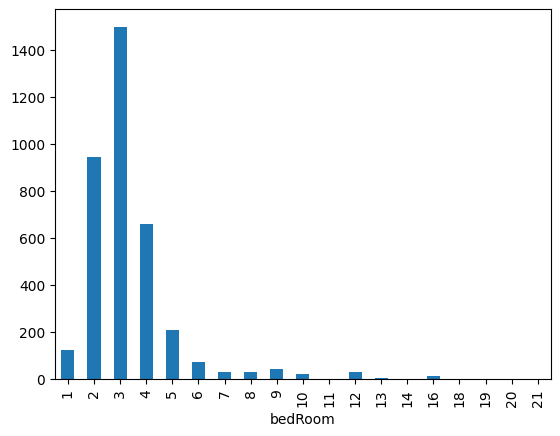

In [40]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

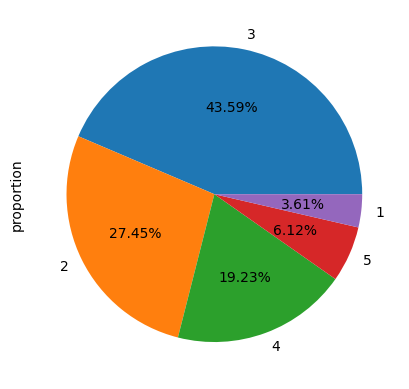

In [41]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

# **bathroom**

In [42]:
df['bathroom'].isnull().sum()

0

<Axes: xlabel='bathroom'>

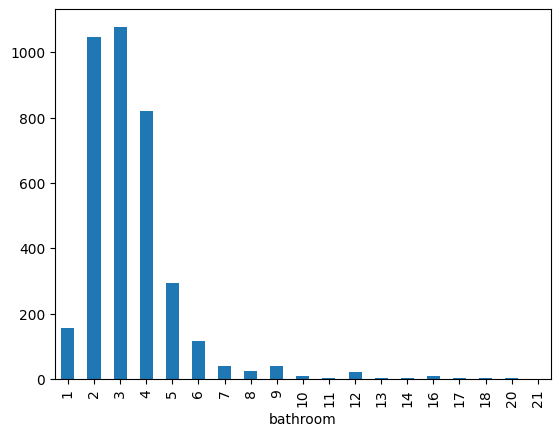

In [43]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

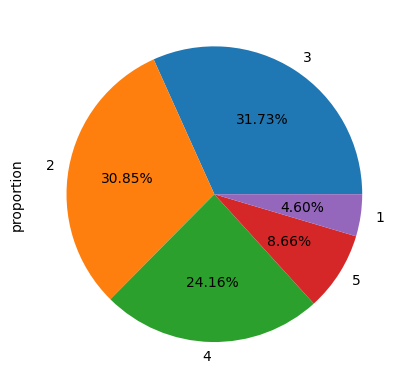

In [44]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [45]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,vatika lifestyle homes,sector 83,1.25,6839.0,1828.0,Super Built up area 1827.5(169.78 sq.m.),3,2,1,...,1827.5,NaN,NaN,1,1,1,1,0,2,174
1,flat,ats triumph,sector 104,4.45,6846.0,6500.0,Carpet area: 6500 (603.87 sq.m.),4,5,3+,...,NaN,NaN,6500.0,0,0,0,0,0,1,110
2,flat,puri diplomatic greens,sector 111,3.50,11864.0,2950.0,Super Built up area 2950(274.06 sq.m.)Built Up...,4,5,3+,...,2950.0,2700.0,2500.0,0,1,0,0,0,0,49
3,flat,shapoorji pallonji joyville gurugram,sector 102,1.26,10041.0,1255.0,Super Built up area 1215(112.88 sq.m.),2,2,2,...,1215.0,NaN,NaN,0,0,0,0,0,1,108
4,flat,bptp terra,sector 37d,1.45,8006.0,1811.0,Super Built up area 1811(168.25 sq.m.)Built Up...,3,3,3,...,1811.0,1711.0,1611.0,0,0,0,0,0,1,149


# **balcony**

In [46]:
df['balcony'].isnull().sum()

0

In [80]:
df['balcony'].value_counts()

,count
balcony,
3+,1172
3,1074
2,884
1,365
0,182


<Axes: xlabel='balcony'>

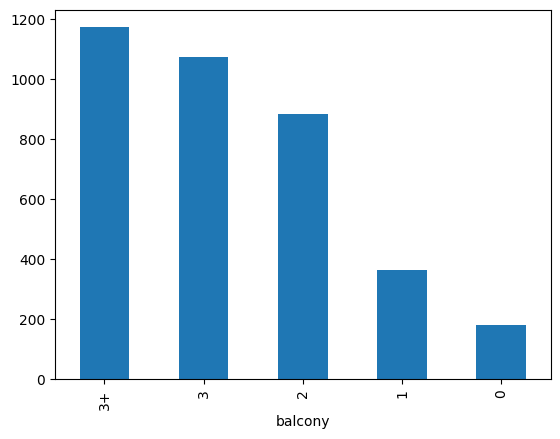

In [47]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

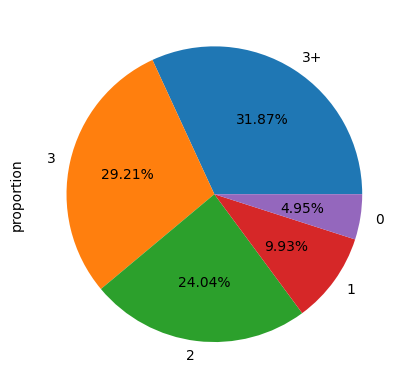

In [48]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

# **FloorNum**

In [49]:
df.iloc[:,10:].head()

,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,6.0,South-West,Relatively New,1827.5,NaN,NaN,1,1,1,1,0,2,174
1,27.0,North,Relatively New,NaN,NaN,6500.0,0,0,0,0,0,1,110
2,10.0,North-East,Relatively New,2950.0,2700.0,2500.0,0,1,0,0,0,0,49
3,10.0,North,Relatively New,1215.0,NaN,NaN,0,0,0,0,0,1,108
4,8.0,South-East,Relatively New,1811.0,1711.0,1611.0,0,0,0,0,0,1,149


In [50]:
df['floorNum'].isnull().sum()

19

In [51]:
df['floorNum'].describe()

,floorNum
count,3658.000000
mean,6.798250
std,6.012454
min,0.000000
25%,2.000000
50%,5.000000
75%,10.000000
max,51.000000


<Axes: xlabel='floorNum'>

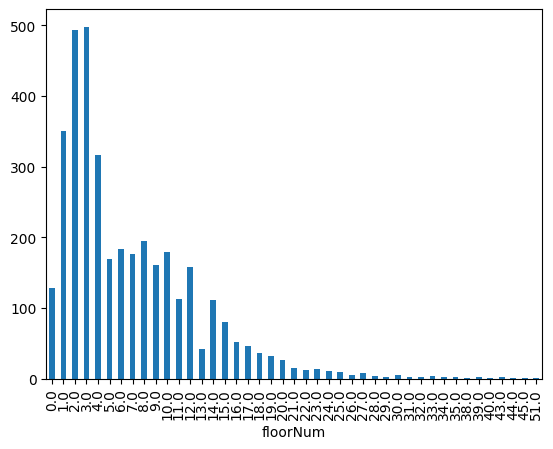

In [52]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='floorNum'>

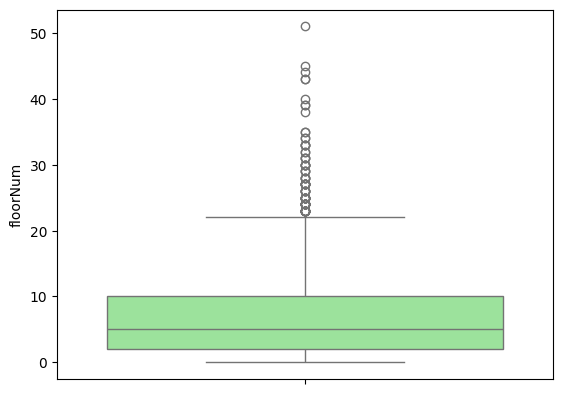

In [53]:
sns.boxplot(df['floorNum'], color='lightgreen')

# **facing**

In [54]:
df['facing'].isnull().sum()

1045

In [55]:
df['facing'].fillna('NA',inplace=True)

In [56]:
df['facing'].value_counts()

,count
facing,
NA,1045
North-East,623
East,623
North,387
West,249
South,231
North-West,193
South-East,173
South-West,153


# **agePossession**

In [57]:
df['agePossession'].isnull().sum()

0

In [58]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1646
New Property,593
Moderately Old,563
Undefined,306
Old Property,303
Under Construction,266


# **areas**

In [59]:
# super built up area
df['super_built_up_area'].isnull().sum()

1802

In [60]:
df['super_built_up_area'].describe()

,super_built_up_area
count,1875.000000
mean,1925.237627
std,764.172177
min,89.000000
25%,1479.500000
50%,1828.000000
75%,2215.000000
max,10000.000000


<Axes: xlabel='super_built_up_area', ylabel='Count'>

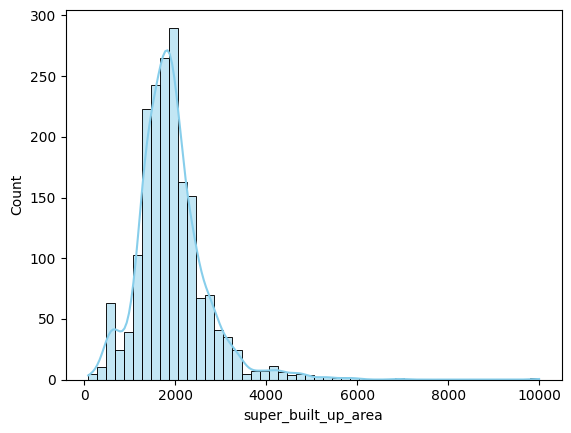

In [61]:
sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)

<Axes: ylabel='super_built_up_area'>

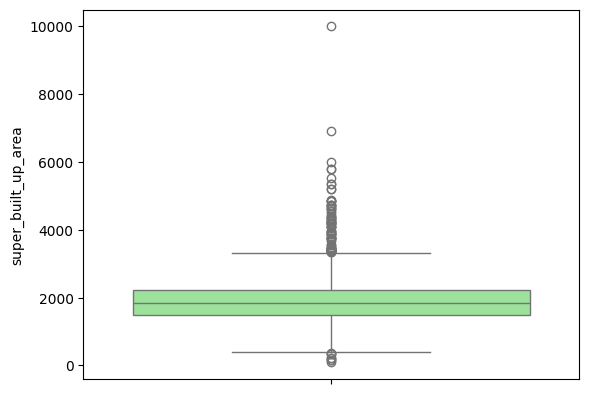

In [62]:
sns.boxplot(df['super_built_up_area'].dropna(), color='lightgreen')

In [63]:
# built up area
df['built_up_area'].isnull().sum()


1987

In [64]:
df['built_up_area'].describe()

,built_up_area
count,1690.000000
mean,2379.585816
std,17942.880237
min,2.000000
25%,1100.000000
50%,1650.000000
75%,2400.000000
max,737147.000000


<Axes: xlabel='built_up_area', ylabel='Count'>

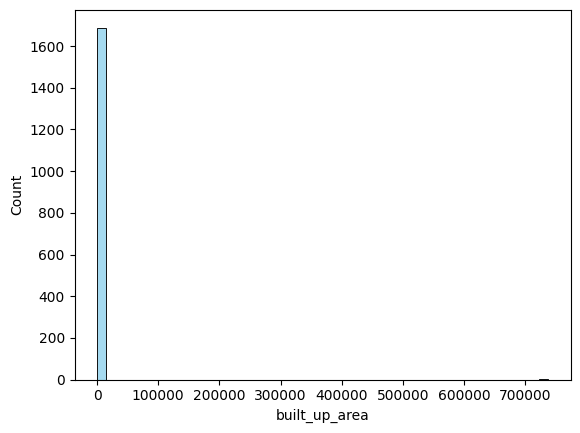

In [65]:
sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: ylabel='built_up_area'>

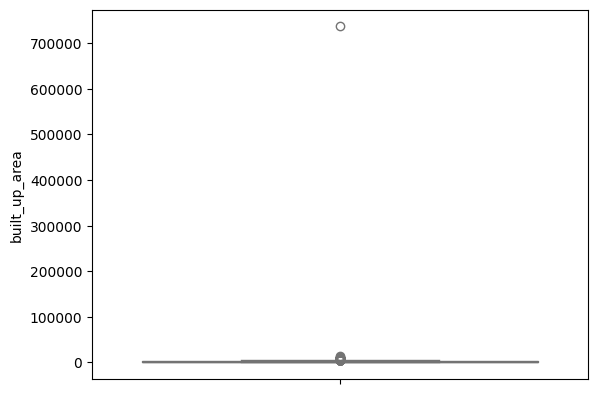

In [66]:
sns.boxplot(df['built_up_area'].dropna(), color='lightgreen')

In [67]:
# carpet area
df['carpet_area'].isnull().sum()

1805

In [68]:
df['carpet_area'].describe()

,carpet_area
count,1872.000000
mean,2529.179507
std,22799.836449
min,15.000000
25%,843.000000
50%,1300.000000
75%,1790.000000
max,607936.000000


<Axes: xlabel='carpet_area', ylabel='Count'>

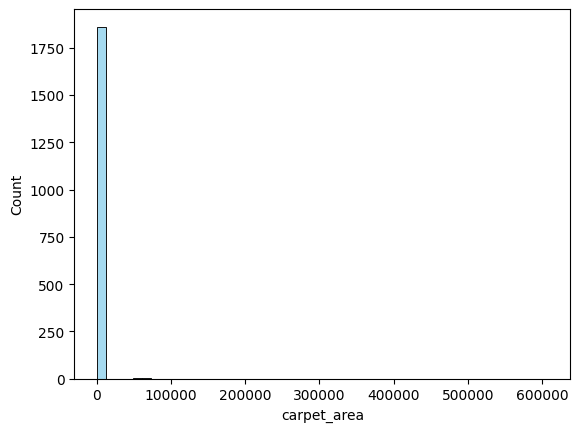

In [69]:
sns.histplot(df['carpet_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: ylabel='carpet_area'>

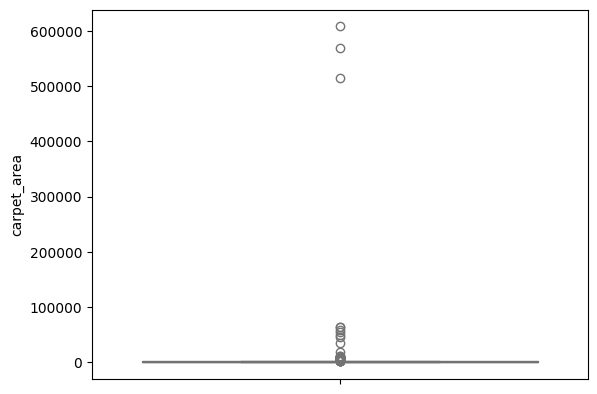

In [70]:
sns.boxplot(df['carpet_area'].dropna(), color='lightgreen')

In [71]:
df.iloc[:,16:]

,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,1,1,1,1,0,2,174
1,0,0,0,0,0,1,110
2,0,1,0,0,0,0,49
3,0,0,0,0,0,1,108
4,0,0,0,0,0,1,149
...,...,...,...,...,...,...,...
3797,0,0,0,0,0,1,49
3798,0,0,1,0,0,1,111
3799,1,1,0,0,0,1,174
3800,0,1,0,1,0,0,111


# **additional rooms**

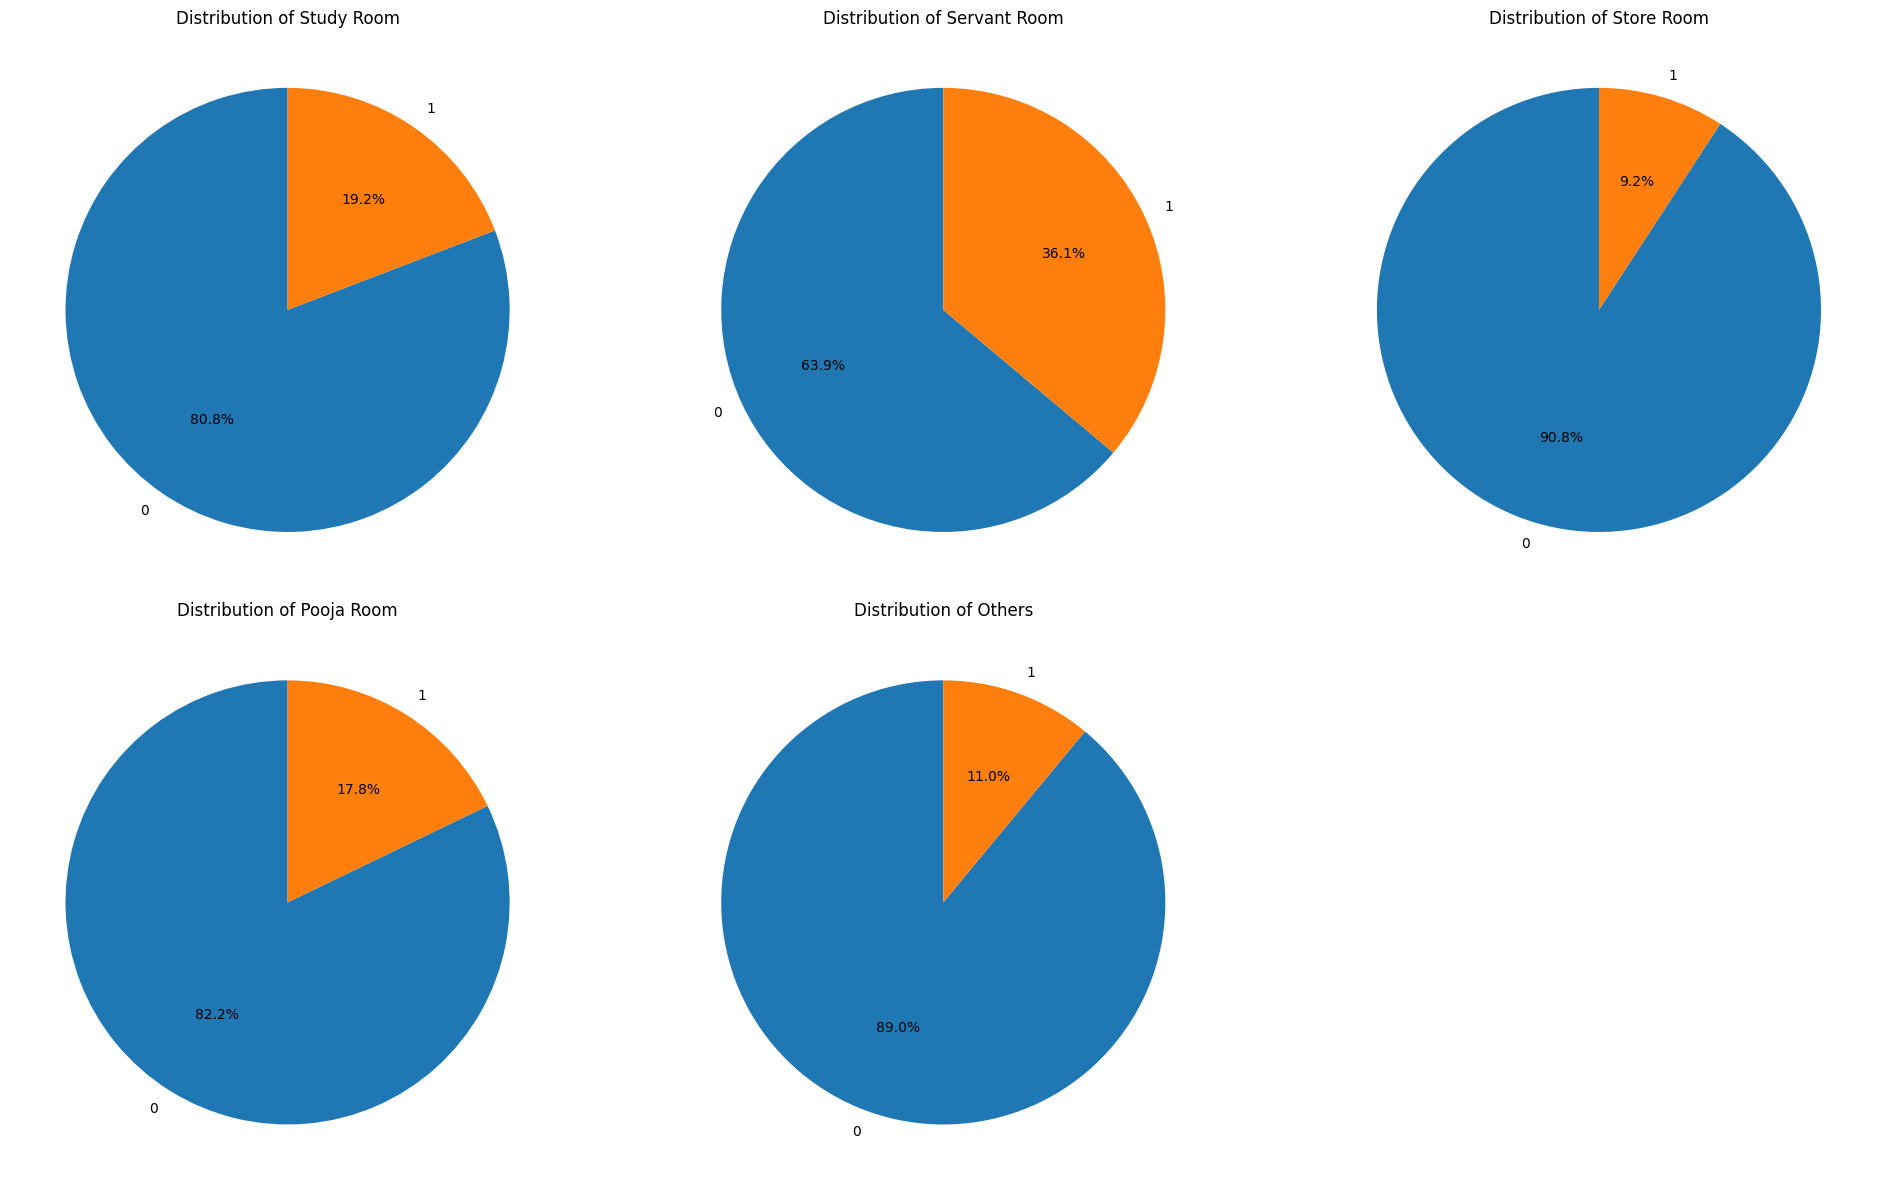

In [72]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

# **furnishing_type**

In [73]:
df['furnishing_type'].value_counts()

,count
furnishing_type,
1,2415
0,1056
2,206


<Axes: ylabel='count'>

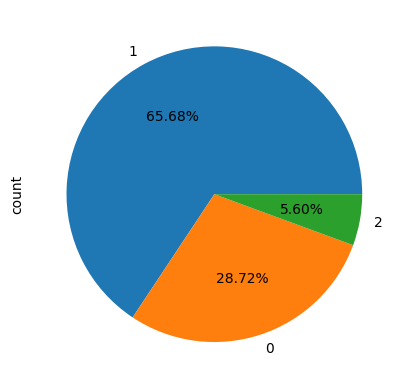

In [74]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

# **luxury score**

In [75]:
df['luxury_score'].isnull().sum()

0

In [76]:
df['luxury_score'].describe()

,luxury_score
count,3677.000000
mean,71.512918
std,53.059082
min,0.000000
25%,31.000000
50%,59.000000
75%,110.000000
max,174.000000


<Axes: xlabel='luxury_score', ylabel='Count'>

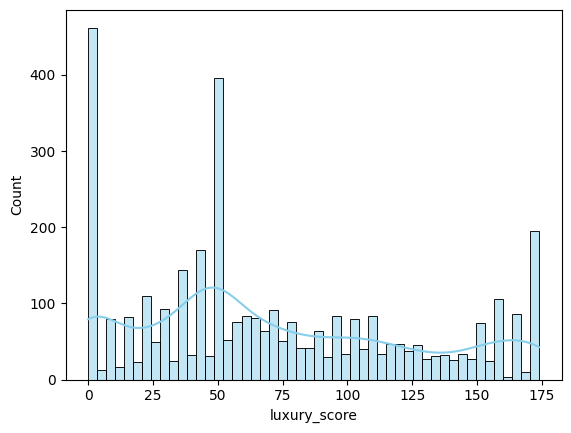

In [77]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

<Axes: ylabel='luxury_score'>

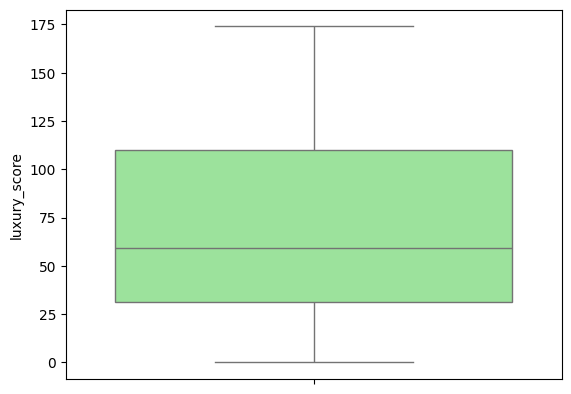

In [78]:
sns.boxplot(df['luxury_score'], color='lightgreen')

In [79]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,vatika lifestyle homes,sector 83,1.25,6839.0,1828.0,Super Built up area 1827.5(169.78 sq.m.),3,2,1,...,1827.5,NaN,NaN,1,1,1,1,0,2,174
1,flat,ats triumph,sector 104,4.45,6846.0,6500.0,Carpet area: 6500 (603.87 sq.m.),4,5,3+,...,NaN,NaN,6500.0,0,0,0,0,0,1,110
2,flat,puri diplomatic greens,sector 111,3.50,11864.0,2950.0,Super Built up area 2950(274.06 sq.m.)Built Up...,4,5,3+,...,2950.0,2700.0,2500.0,0,1,0,0,0,0,49
3,flat,shapoorji pallonji joyville gurugram,sector 102,1.26,10041.0,1255.0,Super Built up area 1215(112.88 sq.m.),2,2,2,...,1215.0,NaN,NaN,0,0,0,0,0,1,108
4,flat,bptp terra,sector 37d,1.45,8006.0,1811.0,Super Built up area 1811(168.25 sq.m.)Built Up...,3,3,3,...,1811.0,1711.0,1611.0,0,0,0,0,0,1,149
